# Applied Machine Learning

We are just starting on this **workshop** now.

The link to the [repo github link](https://github.com/amitkaps/applied-machine-learning)

- Session 1
- Session 2
- Session 3 

In [1]:
# Get the test file
import pandas as pd

In [2]:
! pwd

/Users/amitkaps/Documents/github/workshop-av-2018


In [3]:
df = pd.read_csv("data/creditRisk.csv")

# If you dont have the repo- then do following
df1 = pd.read_csv("https://raw.githubusercontent.com/amitkaps/applied-machine-learning/master/data/creditRisk.csv")

In [4]:
import os

In [5]:
os.getcwd()

'/Users/amitkaps/Documents/github/workshop-av-2018'

## Question 1

Write rules to decide the **Risk** for a person, given their **income** and **credit-history**?

In [6]:
df

,Income,Credit History,Risk
0,0,Unknown,High
1,0,Bad,High
2,0,Good,High
3,14000,Unknown,High
4,14000,Bad,High
5,14000,Good,High
6,16000,Unknown,Moderate
7,16000,Bad,High
8,16000,Good,Moderate
9,34000,Unknown,Moderate


## Python Eco-System Libraries

- *Numpy* - For Multidimensional Arrays
- *Pandas* - For Tabular Data
- *Matplotlib, Seaborn* - For Plotting and Visualisation
- *Scikit-learn* - Fro doing Machine Learning 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
df = pd.read_csv("data/creditRisk.csv")

## Accessing Pandas Dataframe

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.columns

Index(['Income', 'Credit History', 'Risk'], dtype='object')

In [12]:
df.head()

,Income,Credit History,Risk
0,0,Unknown,High
1,0,Bad,High
2,0,Good,High
3,14000,Unknown,High
4,14000,Bad,High


In [13]:
# df.Income.head 
df['Income'].head()

0        0
1        0
2        0
3    14000
4    14000
Name: Income, dtype: int64

In [14]:
df.shape

(18, 3)

In [15]:
# Access any values - iloc for integer index
df.iloc[0:2,0:2]

,Income,Credit History
0,0,Unknown
1,0,Bad


In [16]:
# Access any values - loc for label index
df.loc[0:1, ['Income', 'Credit_History']]

/Users/amitkaps/miniconda3/envs/workshop/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Income,Credit_History
0,0,NaN
1,0,NaN


In [17]:
df.index

RangeIndex(start=0, stop=18, step=1)

## Plotting this Data

In [18]:
import seaborn as sns
plt.style.use('ggplot')

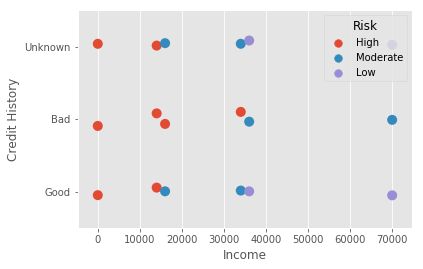

In [19]:
sns.stripplot(data=df, x = "Income", y="Credit History", 
              hue="Risk", size=10)

# Prepare the Data

In [20]:
df['Credit History'].unique()

array(['Unknown', 'Bad', 'Good'], dtype=object)

In [21]:
# Import the module
from sklearn.preprocessing import LabelEncoder

In [22]:
# Instatiate it
le = LabelEncoder()

In [23]:
# Fit it to the column
le.fit(df["Credit History"])

LabelEncoder()

In [24]:
# Transform the column
df_transform = df.copy()
df_transform["Credit History"] = le.transform(df["Credit History"])

In [25]:
df_transform.head()

,Income,Credit History,Risk
0,0,2,High
1,0,0,High
2,0,1,High
3,14000,2,High
4,14000,0,High


In [26]:
le.classes_

array(['Bad', 'Good', 'Unknown'], dtype=object)

In [27]:
le.inverse_transform(np.array([0,1,2]))

array(['Bad', 'Good', 'Unknown'], dtype=object)

### Transform the Risk columns

In [28]:
le2 = LabelEncoder()
le2.fit(df['Risk'])

LabelEncoder()

In [29]:
df_transform['Risk'] = le2.transform(df['Risk'])

In [30]:
df_transform.head()

,Income,Credit History,Risk
0,0,2,0
1,0,0,0
2,0,1,0
3,14000,2,0
4,14000,0,0


## Decision Tree Classifier

Feature (X)  & Targets (y)

In [31]:
X = df_transform[["Income", "Credit History"]]
y = df_transform[["Risk"]]

In [32]:
from sklearn import tree

In [33]:
# Instantiate an instance
clf = tree.DecisionTreeClassifier()

In [34]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Please in the terminal

```
pip install modelvis
````  
  

In [35]:
import modelvis

In [36]:
modelvis.print_tree_as_code(clf)

def predict(row):
    """Your decision-tree model wrote this code."""
    # 18 samples; value=[8, 4, 6]; class=0
    if row[0] < 15000.0:
        # 6 samples; value=[6, 0, 0]; class=0
        return 0
    else:
        # 12 samples; value=[2, 4, 6]; class=2
        if row[0] < 35000.0:
            # 6 samples; value=[2, 0, 4]; class=2
            if row[1] < 0.5:
                # 2 samples; value=[2, 0, 0]; class=0
                return 0
            else:
                # 4 samples; value=[0, 0, 4]; class=2
                return 2
        else:
            # 6 samples; value=[0, 4, 2]; class=1
            if row[1] < 0.5:
                # 2 samples; value=[0, 0, 2]; class=2
                return 2
            else:
                # 4 samples; value=[0, 4, 0]; class=1
                return 1



In [ ]:
modelvis.render_tree(clf, class_names=["Low", "Moderate", "High"],
                    feature_names = X.columns)